### We read in the data

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics

day_hour_count = pd.read_csv("bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21,34,43,47,51,89,106
1,0.1,39,22,27,37,56,87,100
2,0.2,31,24,26,42,50,98,77
3,0.3,26,27,25,29,52,99,87
4,0.4,19,24,29,29,50,98,69
...,...,...,...,...,...,...,...,...
235,23.5,36,65,60,94,80,93,28
236,23.6,37,61,66,100,81,95,28
237,23.7,30,42,49,80,101,105,27
238,23.8,33,52,47,79,91,93,24


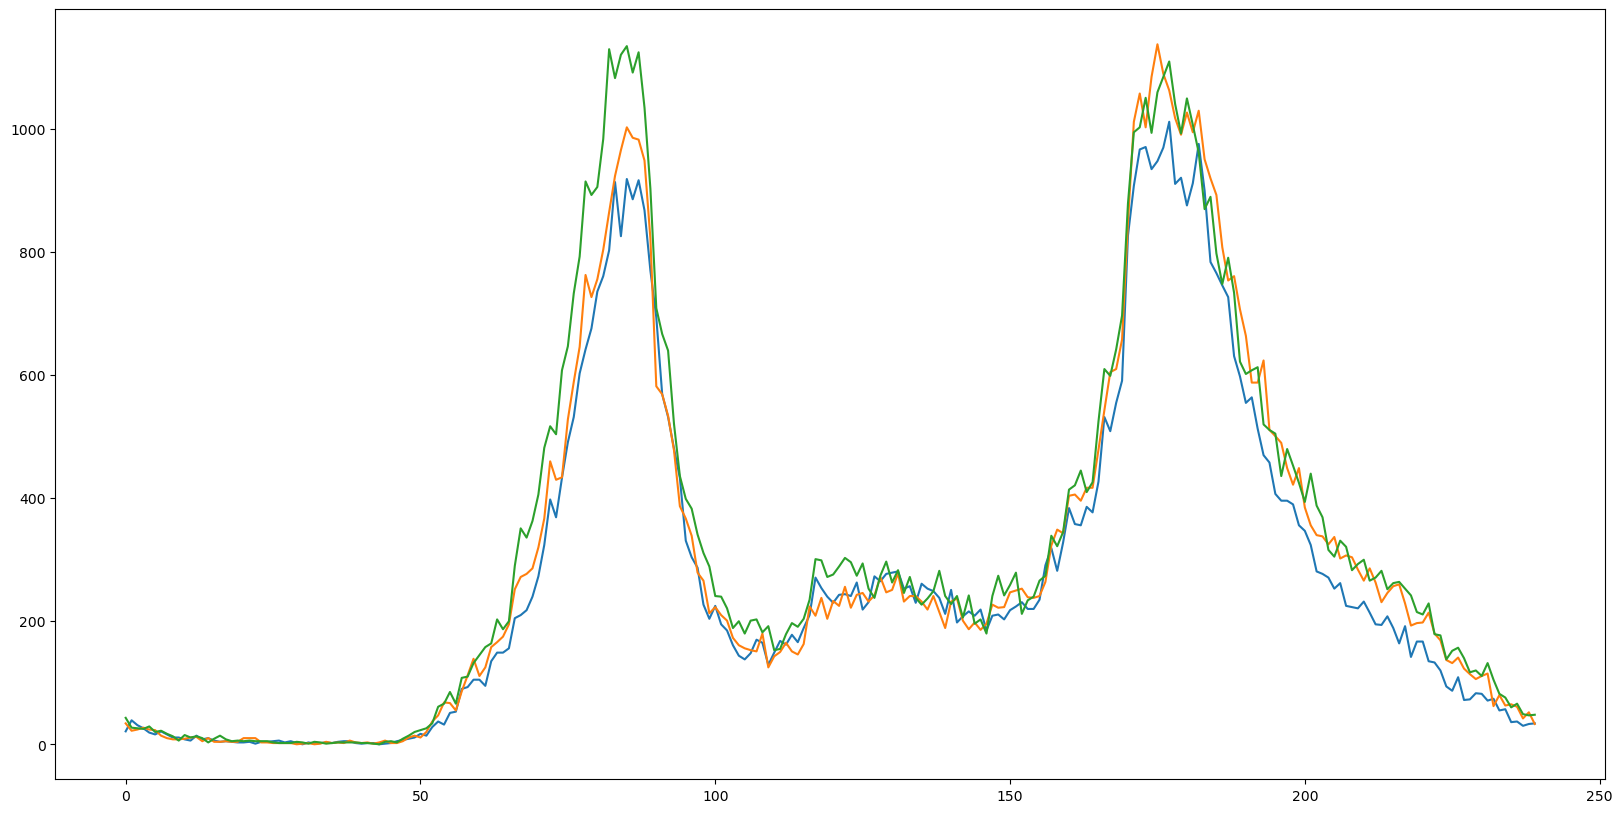

In [73]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [74]:
monday = day_hour_count[["hour","monday"]].copy()

In [75]:
tuesday = day_hour_count[["hour","tuesday"]].copy()

In [76]:
saturday = day_hour_count[["hour","saturday"]].copy()

In [77]:
sunday = day_hour_count[["hour","sunday"]].copy()

In [78]:
monday

,hour,monday
0,0.0,21
1,0.1,39
2,0.2,31
3,0.3,26
4,0.4,19
...,...,...
235,23.5,36
236,23.6,37
237,23.7,30
238,23.8,33


In [79]:
tuesday

,hour,tuesday
0,0.0,34
1,0.1,22
2,0.2,24
3,0.3,27
4,0.4,24
...,...,...
235,23.5,65
236,23.6,61
237,23.7,42
238,23.8,52


In [80]:
saturday

,hour,saturday
0,0.0,89
1,0.1,87
2,0.2,98
3,0.3,99
4,0.4,98
...,...,...
235,23.5,93
236,23.6,95
237,23.7,105
238,23.8,93


In [81]:
sunday

,hour,sunday
0,0.0,106
1,0.1,100
2,0.2,77
3,0.3,87
4,0.4,69
...,...,...
235,23.5,28
236,23.6,28
237,23.7,27
238,23.8,24



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [84]:
from sklearn.preprocessing import PolynomialFeatures

hour = monday.hour.values.reshape(-1,1)
mon = monday.monday.values.reshape(-1,1)

poly5 = PolynomialFeatures(degree = 5)
poly15 = PolynomialFeatures(degree = 15)
poly20 = PolynomialFeatures(degree = 20)

mon_5 = poly5.fit_transform(hour)
mon_15 = poly15.fit_transform(hour)
mon_20 = poly20.fit_transform(hour)

linear = linear_model.LinearRegression()
linear.fit(hour, mon)

LinearRegression()

In [87]:
mon_lin_5 = linear_model.LinearRegression()
mon_lin_15 = linear_model.LinearRegression()
mon_lin_20 = linear_model.LinearRegression()

mon_lin_5.fit(mon_5, mon)
mon_lin_15.fit(mon_15, mon)
mon_lin_20.fit(mon_20, mon)

(mon_lin_5.coef_, linear.intercept_)
(mon_lin_15.coef_, linear.intercept_)
(mon_lin_20.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -1.65658278e-14,  2.02122306e-18,
          1.42417102e-20, -6.38181145e-21, -7.15191371e-20,
         -7.81712934e-19, -8.17580759e-18, -8.10853993e-17,
         -7.51834408e-16, -6.37985192e-15, -4.79294291e-14,
         -3.01416655e-13, -1.42195086e-12, -3.75437161e-12,
          9.95460278e-13, -1.00391565e-13,  4.96769788e-15,
         -1.21535205e-16,  1.18230350e-18, -8.67719959e-23]]),
 array([114.23817427]))

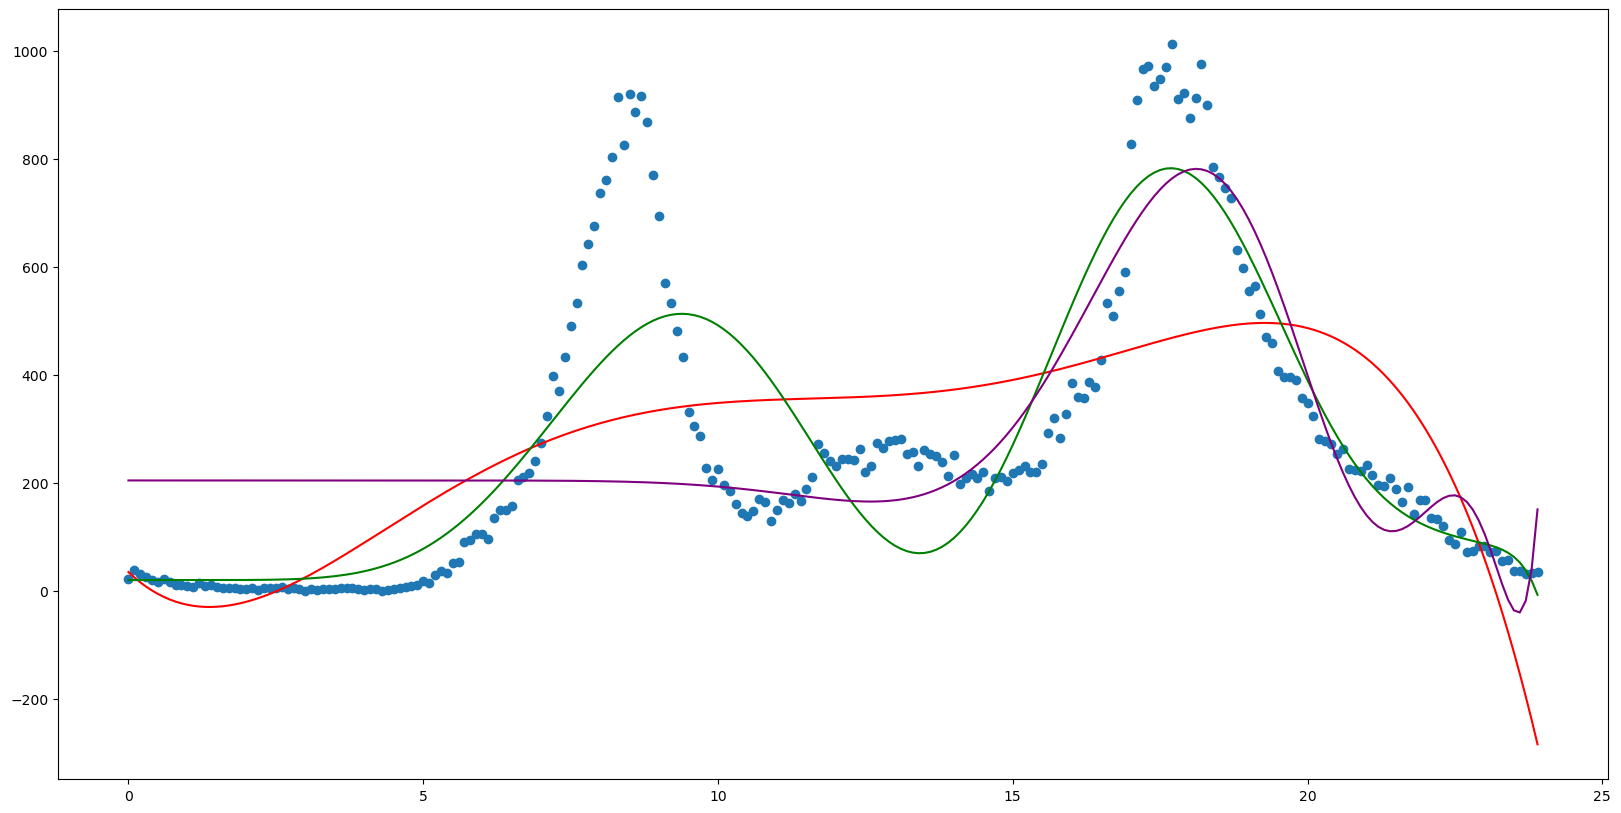

In [89]:
plt.scatter(monday.hour, monday.monday)
plt.plot(hour, mon_lin_5.predict(mon_5), c = 'red')
plt.plot(hour, mon_lin_15.predict(mon_15), c = 'green')
plt.plot(hour, mon_lin_20.predict(mon_20), c = 'purple')


## Model 2 (green) or the polynomial model with 15 variables. The 5 variable polynomial doesn't fit closely enough to the data with all of the curves. Contrary to the smaller polynomial, the largest one, the 20 variable, takes too many curves near the end and beginning with the more concentrated data points. The 15 degree polynomial takes the "just right" route of moving along the same curve without too high of concentration at any one point. It also has the smallest MSE out of the 3 models. (See below.)


In [137]:
(
metrics.mean_squared_error(mon[-4:], mon_lin_5.predict(mon_5[-4:])),
metrics.mean_squared_error(mon[-4:], mon_lin_15.predict(mon_15[-4:])),
metrics.mean_squared_error(mon[-4:], mon_lin_20.predict(mon_20[-4:]))
)

(65890.53913904465, 561.8264252961378, 5502.914493822458)

## 2b. Repeat `2a` for `saturday`

In [96]:
sat = saturday.saturday.values.reshape(-1,1)

sat_5 = poly5.fit_transform(hour)
sat_15 = poly15.fit_transform(hour)
sat_20 = poly20.fit_transform(hour)

linear = linear_model.LinearRegression()
linear.fit(hour, sat)

LinearRegression()

In [97]:
sat_lin_5 = linear_model.LinearRegression()
sat_lin_15 = linear_model.LinearRegression()
sat_lin_20 = linear_model.LinearRegression()

sat_lin_5.fit(sat_5, sat)
sat_lin_15.fit(sat_15, sat)
sat_lin_20.fit(sat_20, sat)

(sat_lin_5.coef_, linear.intercept_)
(sat_lin_15.coef_, linear.intercept_)
(sat_lin_20.coef_, linear.intercept_)

(array([[ 0.00000000e+00,  1.30326314e-13, -1.58725803e-17,
         -1.11944581e-19,  5.01858820e-20,  5.62345660e-19,
          6.14567767e-18,  6.42657858e-17,  6.37231794e-16,
          5.90678169e-15,  5.01028478e-14,  3.76173043e-13,
          2.36322785e-12,  1.11253983e-11,  2.91819918e-11,
         -9.00284181e-12,  1.10626709e-12, -7.16114797e-14,
          2.59158550e-15, -4.98141622e-17,  3.97646141e-19]]),
 array([91.97282158]))

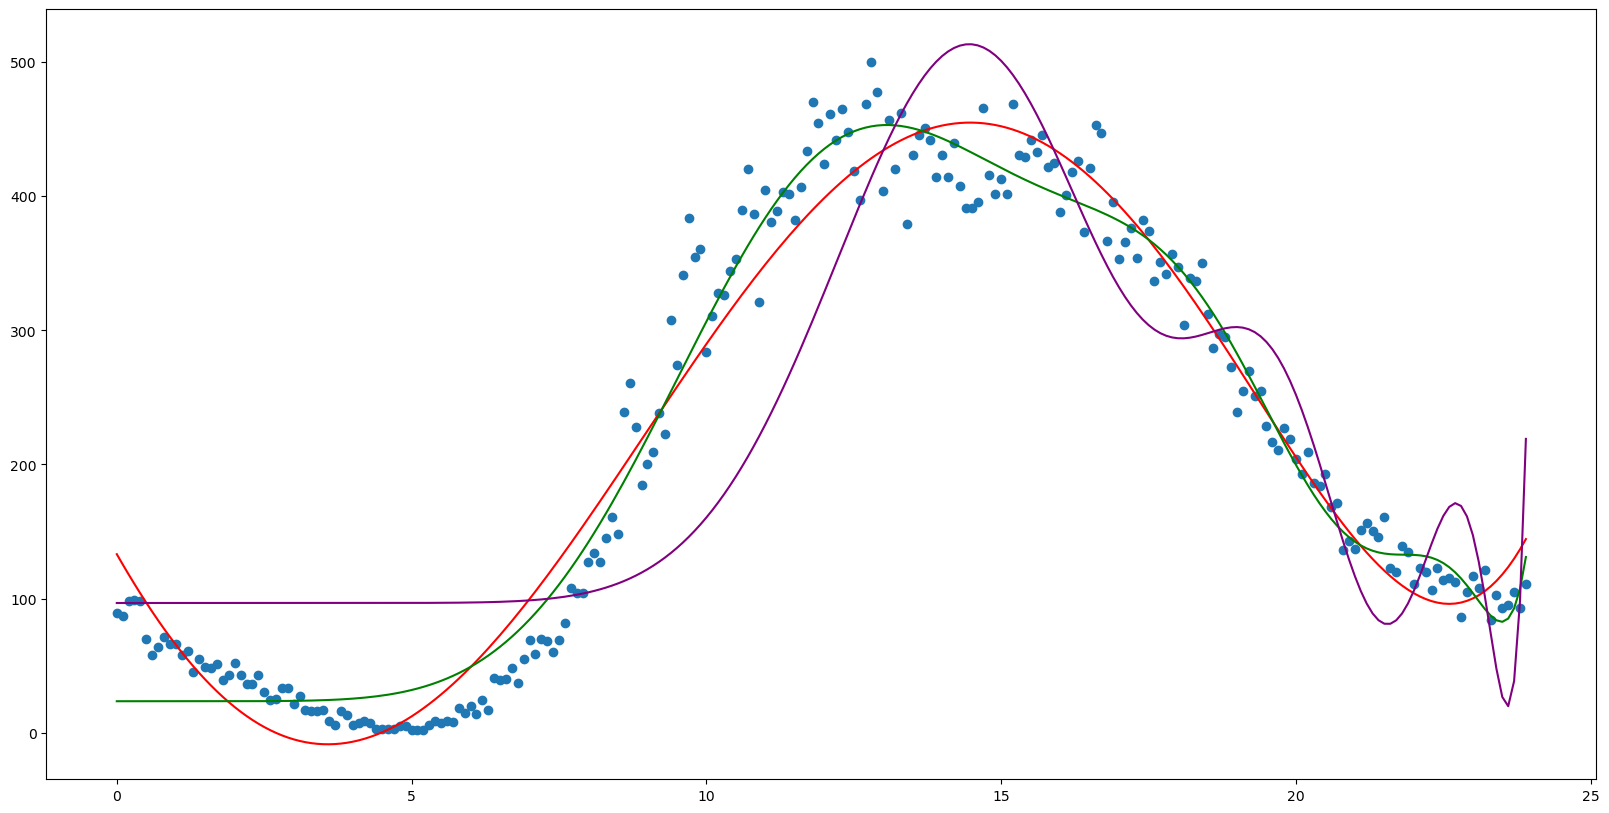

In [98]:
plt.scatter(saturday.hour, saturday.saturday)
plt.plot(hour, sat_lin_5.predict(sat_5), c = 'red')
plt.plot(hour, sat_lin_15.predict(sat_15), c = 'green')
plt.plot(hour, sat_lin_20.predict(sat_20), c = 'purple')

## 3. Similar to Monday's models, out of Saturday's models, the 15 degree polynomial is the best fit to the data and has the least MSE to the true data. It doesn't take unessary dips and jumps with every small curve in the data, but still moves with the patterns.


In [138]:
(
metrics.mean_squared_error(sat[-4:], sat_lin_5.predict(sat_5[-4:])),
metrics.mean_squared_error(sat[-4:], sat_lin_15.predict(sat_15[-4:])),
metrics.mean_squared_error(sat[-4:], sat_lin_20.predict(sat_20[-4:]))
)

(1109.1255203207406, 212.79900076571732, 5451.570151154124)

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


In [110]:
#Monday/Tuesday
(
metrics.mean_squared_error(mon[-4:], mon_lin_15.predict(mon_15[-4:])),
metrics.mean_absolute_error(mon[-4:], mon_lin_15.predict(mon_15[-4:])),
metrics.mean_absolute_percentage_error(mon[-4:], mon_lin_15.predict(mon_15[-4:]))
)

(561.8264252961378, 19.794336557388306, 0.5841382371315109)

In [111]:
tue = tuesday.tuesday.values.reshape(-1,1)
(
metrics.mean_squared_error(tue[-4:], mon_lin_15.predict(mon_15[-4:])),
metrics.mean_absolute_error(tue[-4:], mon_lin_15.predict(mon_15[-4:])),
metrics.mean_absolute_percentage_error(tue[-4:], mon_lin_15.predict(mon_15[-4:]))
)

(723.1544148743849, 21.903178930282593, 0.5326574954947045)

In [112]:
#Saturday/Sunday
(
metrics.mean_squared_error(sat[-4:], sat_lin_15.predict(sat_15[-4:])),
metrics.mean_absolute_error(sat[-4:], sat_lin_15.predict(sat_15[-4:])),
metrics.mean_absolute_percentage_error(sat[-4:], sat_lin_15.predict(sat_15[-4:]))
)

(212.79900076571732, 14.111837923526764, 0.1386742003946307)

In [113]:
sun = sunday.sunday.values.reshape(-1,1)
(
metrics.mean_squared_error(sun[-4:], sat_lin_15.predict(sat_15[-4:])),
metrics.mean_absolute_error(sun[-4:], sat_lin_15.predict(sat_15[-4:])),
metrics.mean_absolute_percentage_error(sun[-4:], sat_lin_15.predict(sat_15[-4:]))
)

(6533.727641015091, 78.45328197181226, 3.156919231013168)

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

In [115]:
from sklearn.model_selection import train_test_split

In [125]:
#Saturday
xtrain, xtest, ytrain, ytest = train_test_split(hour, sat, test_size = 0.2)
linear = linear_model.LinearRegression().fit(xtrain, ytrain)

In [126]:
xtrain15 = PolynomialFeatures(degree = 15).fit_transform(xtrain)
xtest15 = PolynomialFeatures(degree = 15).fit_transform(xtest)

linear15 = linear_model.LinearRegression().fit(xtrain15, ytrain)

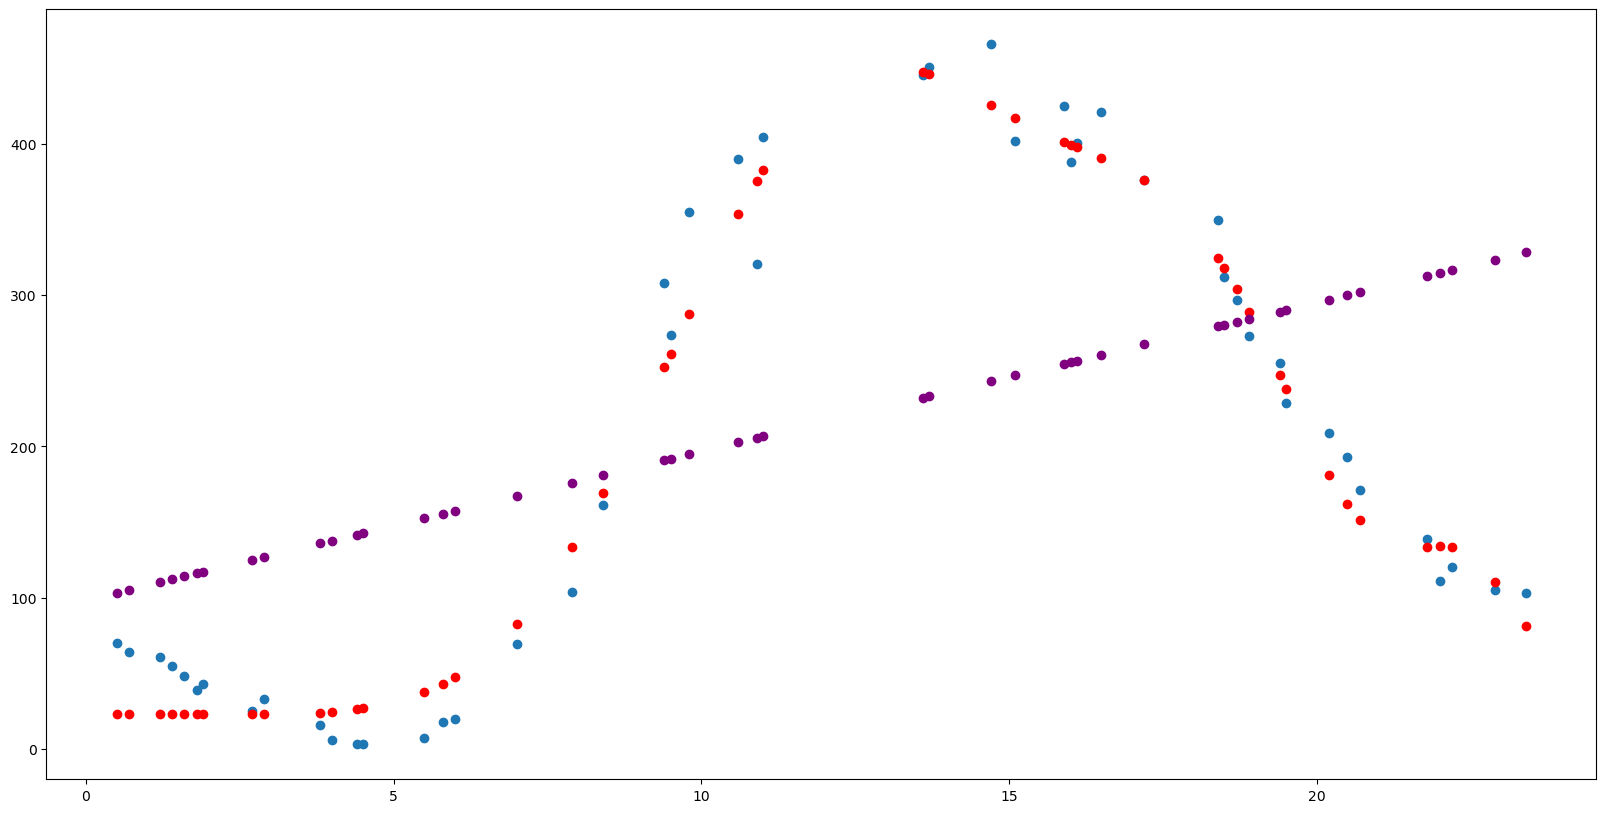

In [131]:
plt.scatter(xtest, ytest)
plt.scatter(xtest, linear15.predict(xtest15), c = 'red')
plt.scatter(xtest, linear.predict(xtest), c = 'purple')

In [132]:
(
metrics.mean_squared_error(ytest, linear15.predict(xtest15)),
metrics.mean_absolute_error(ytest, linear15.predict(xtest15)),
metrics.mean_absolute_percentage_error(ytest, linear15.predict(xtest15))
)

(695.9487707217071, 21.66694172833303, 0.6992783364740897)

In [133]:
#Monday
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(hour, mon, test_size = 0.2)
linear2 = linear_model.LinearRegression().fit(xtrain2, ytrain2)

In [134]:
xtrain2_15 = PolynomialFeatures(degree = 15).fit_transform(xtrain2)
xtest2_15 = PolynomialFeatures(degree = 15).fit_transform(xtest2)

linear2_15 = linear_model.LinearRegression().fit(xtrain2_15, ytrain2)

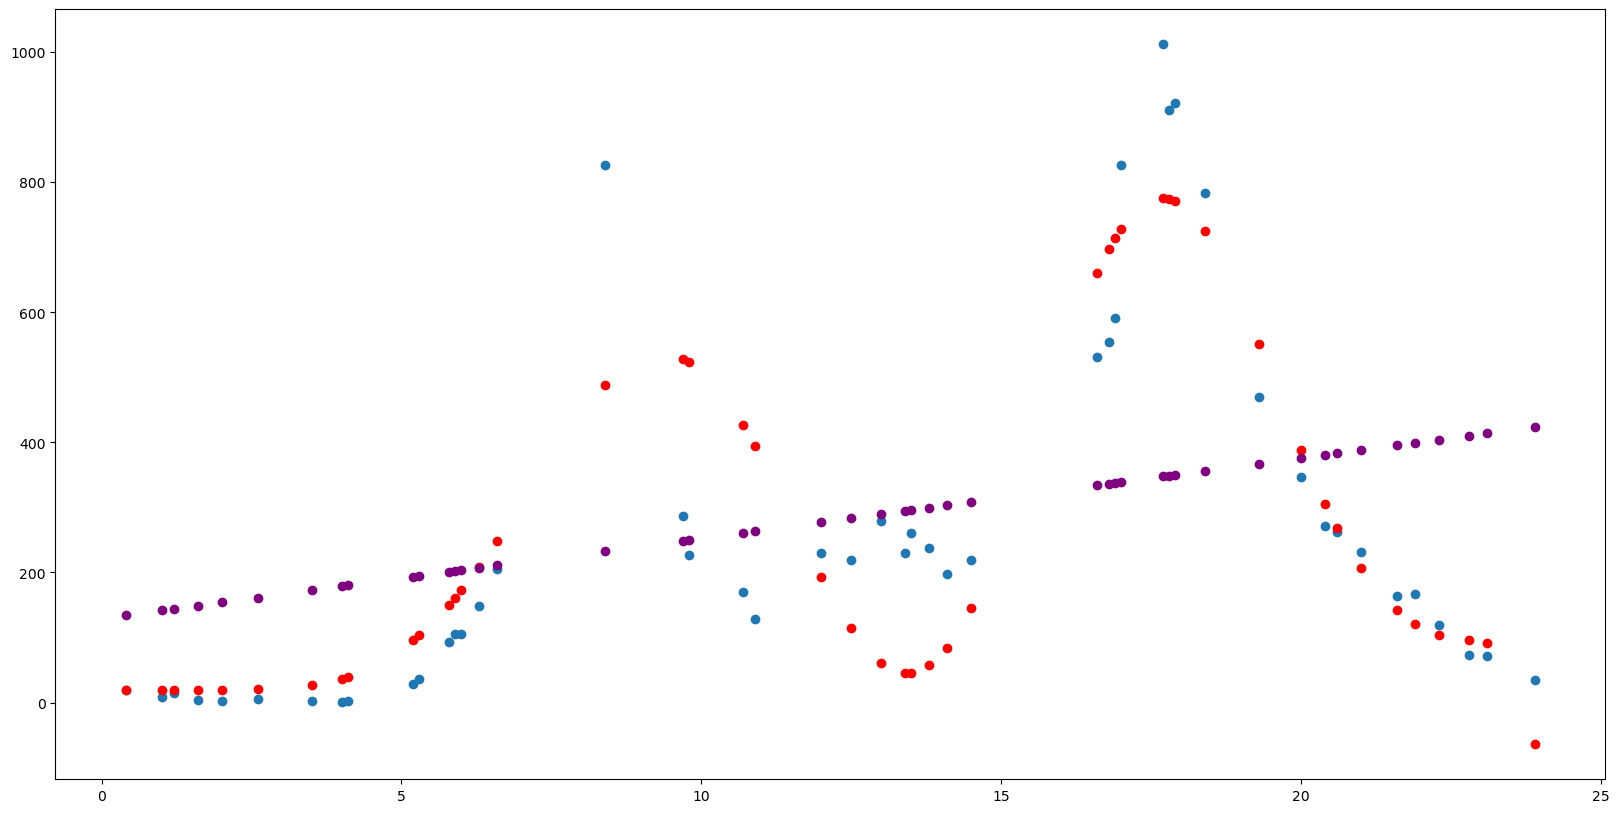

In [135]:
plt.scatter(xtest2, ytest2)
plt.scatter(xtest2, linear2_15.predict(xtest2_15), c = 'red')
plt.scatter(xtest2, linear2.predict(xtest2), c = 'purple')

In [136]:
(
metrics.mean_squared_error(ytest2, linear2_15.predict(xtest2_15)),
metrics.mean_absolute_error(ytest2, linear2_15.predict(xtest2_15)),
metrics.mean_absolute_percentage_error(ytest2, linear2_15.predict(xtest2_15))
)

(16726.443861718904, 95.70812407955282, 2.1637409995765275)